# Report

## Introduction
In this pythonnotebook, I implemented a Convolutional Neural Network (CNN) autoencoder to classify images from the Fashion MNIST dataset. The autoencoder architecture consists of an encoder that compresses the input images into a low-dimensional latent space and a decoder that reconstructs the original images from this compressed representation. Additionally, a classifier is added on top of the latent space to map the compressed features to the corresponding class labels.

## Dataset Analysis and Preprocessing

### 1. Loading the Fashion MNIST Dataset
I loaded the Fashion MNIST dataset from a CSV file using the `FashionMNISTDataset` class. This class reads the data from the CSV file, where the first column contains the labels and the remaining columns contain the pixel values of the images. The images are reshaped into 28x28 grayscale format, and I applied necessary transformations to normalize the data.

### 2. Splitting the Training Data
To prepare the dataset for training, validation, and testing, I split the training data into three subsets in the ratio of 70:10:20. This was achieved using the `random_split` function from PyTorch, which allows for easy partitioning of the dataset. The sizes of the datasets are as follows:
- **Training Set**: 70% of the total training data
- **Validation Set**: 10% of the total training data
- **Test Set**: 20% of the total training data


### Code Explanation
The code begins by importing the necessary libraries, including PyTorch, NumPy, Matplotlib, and Pandas. I set random seeds for reproducibility and defined the device for computation (GPU or CPU). The `FashionMNISTDataset` class is defined to handle the loading and transformation of the dataset.

The data preprocessing steps include:
- Normalizing the images using `transforms.Normalize`.
- Loading the training and test datasets from CSV files.
- Splitting the training dataset into training, validation, and test sets using the `random_split` function.
- Creating DataLoader objects for each dataset to facilitate batch processing during training.

Finally, I printed the sizes of the training, validation, and test sets to confirm the splits.


In [1]:
# Cell 1: Imports and Setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from torchvision import transforms
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Custom Dataset class for Fashion MNIST
class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        label = self.data.iloc[idx, 0]
        image = self.data.iloc[idx, 1:].values.astype(np.uint8).reshape(28, 28)
        image = Image.fromarray(image)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_full = FashionMNISTDataset('../../data/external/archive/fashion-mnist_train.csv', transform=transform)
test_dataset = FashionMNISTDataset('../../data/external/archive/fashion-mnist_test.csv', transform=transform)

# Split training data
total_size = len(train_full)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, remaining = random_split(train_full, [train_size, val_size, test_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Using device: cuda
Training set size: 42000
Validation set size: 6000
Test set size: 10000


## Data Loading and Preprocessing

### Dataset Loading


##  Visualization

### Visualizing the Fashion MNIST Dataset
To gain insights into the dataset, I implemented the `show_fashion_mnist` function, which visualizes one image from each class of clothing. The following steps were taken:

1. **Image Retrieval**: The function retrieves a batch of images and labels from the training DataLoader. It then creates a dictionary to store one image per class.

2. **Class Sample Selection**: The function iterates through the images and labels, storing the first image encountered for each class in the dictionary. This ensures that I have a representative sample from each clothing category.

3. **Image Plotting**: The selected images are plotted in a single row using Matplotlib. Each subplot displays one image along with its corresponding class label.

4. **Class Mapping**: After displaying the images, the function prints a mapping of class indices to their respective clothing types, providing clarity on what each class represents.

### Class Mapping
The clothing types represented by each class are as follows:
- **0**: T-shirt/top
- **1**: Trouser
- **2**: Pullover
- **3**: Dress
- **4**: Coat
- **5**: Sandal
- **6**: Shirt
- **7**: Sneaker
- **8**: Bag
- **9**: Ankle boot


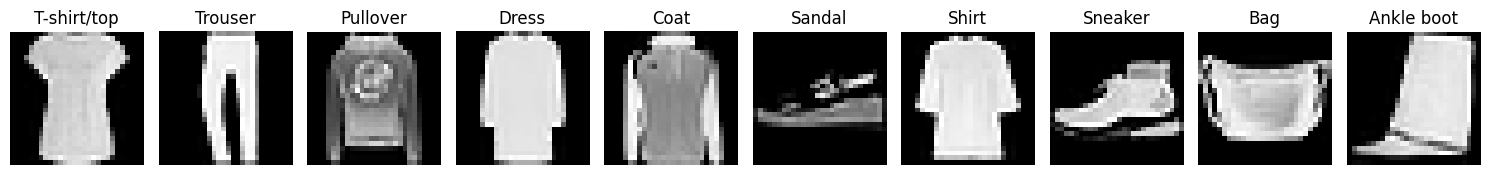


Class Mapping:
Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


In [2]:
# Cell 2: Visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_fashion_mnist(loader):
    # Get a batch of images
    images, labels = next(iter(loader))
    
    # Create a dictionary to store one image per class
    class_samples = {i: None for i in range(len(class_names))}
    
    # Find one image from each class
    for img, lbl in zip(images, labels):
        if class_samples[lbl.item()] is None:
            class_samples[lbl.item()] = img
        if all(v is not None for v in class_samples.values()):
            break
    
    # Plot images
    plt.figure(figsize=(15, 3))
    for i in range(len(class_names)):
        plt.subplot(1, 10, i+1)
        plt.imshow(class_samples[i].squeeze(), cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print class mapping
    print("\nClass Mapping:")
    for i, name in enumerate(class_names):
        print(f"Class {i}: {name}")

# Show one image from each class
show_fashion_mnist(train_loader)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## 4.2.2 CNN Autoencoder Implementation with Variable Layers

### Overview of the CnnAutoencoder Class
In this cell, I implemented the `CnnAutoencoder` class, which consists of both encoder and decoder components. The architecture is designed to learn efficient representations of input images from the Fashion MNIST dataset. The class includes the following key functions: `encode()`, `decode()`, and `forward()`.

### Class Structure
1. **Initialization (`__init__` method)**:
   - The constructor initializes the encoder and decoder layers based on the specified number of layers and the latent dimension.
   - I used lists to hold the layers for both the encoder and decoder, allowing for flexible configuration based on the `num_layers` parameter.
   - The encoder is built using convolutional layers followed by ReLU activations and max pooling layers to reduce the spatial dimensions of the input images.
   - The final encoder layer outputs a latent representation of the specified `latent_dim`.
   - The decoder is constructed by reversing the channel configuration of the encoder, using transposed convolutional layers to upsample the latent representation back to the original image size.

2. **Encoder Configuration**:
   - The encoder starts with an input channel of 1 (for grayscale images) and progressively increases the number of channels (16, 32, 64) based on the `num_layers` parameter.
   - Each encoder layer consists of a convolutional operation followed by a ReLU activation and a max pooling operation to downsample the feature maps.

3. **Decoder Configuration**:
   - The decoder reverses the encoder's operations, starting with the latent dimension and progressively increasing the number of channels back to 1.
   - Each decoder layer uses a transposed convolution to upsample the feature maps, followed by a ReLU activation.
   - The final layer of the decoder uses a convolutional operation with a Tanh activation function to produce the reconstructed image.

### Key Functions
1. **`encode()` Function**:
   - This function takes an input tensor `x` and passes it through the encoder layers.
   - It reduces the spatial dimensions of the input image, resulting in a compressed latent representation.
   - The output of this function is the latent space vector, which captures the essential features of the input image.

2. **`decode()` Function**:
   - The `decode()` function takes the latent representation as input and reconstructs it back into an image.
   - It passes the latent vector through the decoder layers, effectively reversing the encoding process.
   - The output is a reconstructed image that should closely resemble the original input image.

3. **`forward()` Function**:
   - The `forward()` function governs the forward pass of the autoencoder.
   - It first calls the `encode()` function to obtain the latent representation and then calls the `decode()` function to reconstruct the image from the latent space.
   - This function is essential for integrating the encoding and decoding processes into a single forward pass, allowing for seamless training of the autoencoder.

### Model Initialization

Testing visualize_reconstructions...


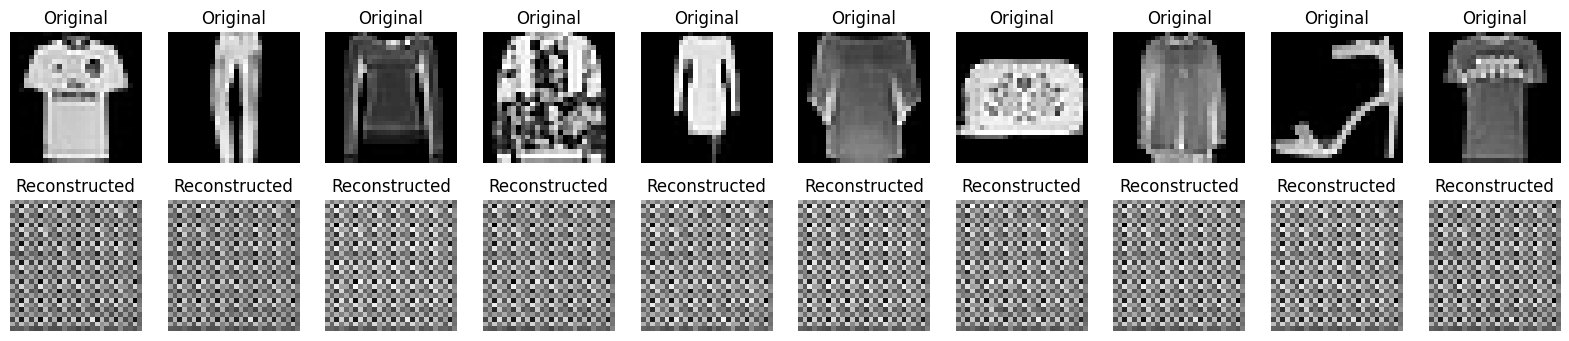


Testing visualize_latent_space...


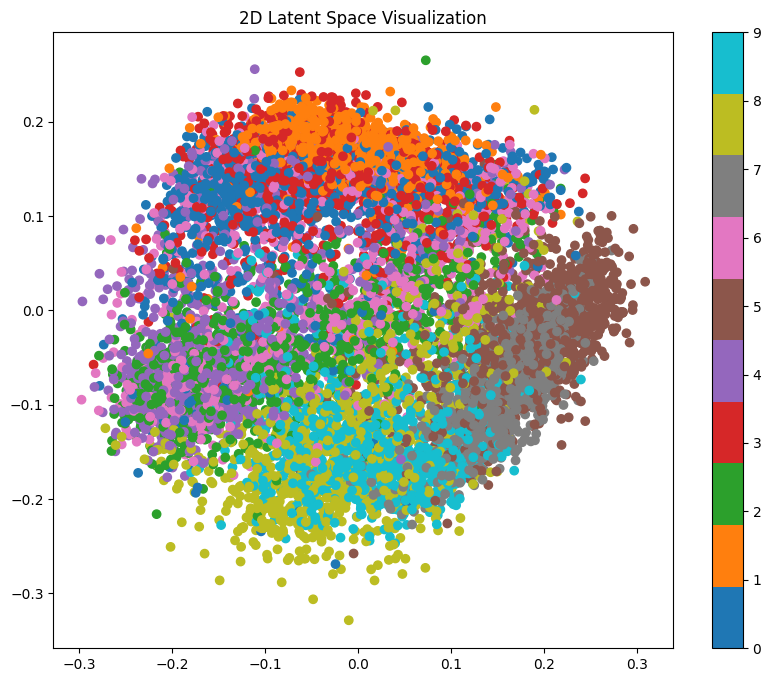

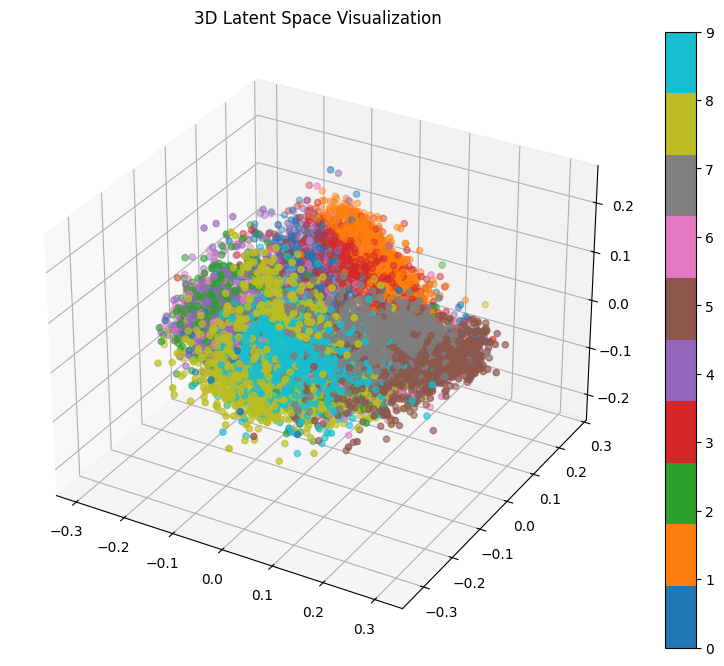


Visualization Summary:
1. Displayed 10 pairs of original and reconstructed images
2. Created 2D latent space visualization
3. Created 3D latent space visualization


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # [batch, 16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # [batch, 32, 7, 7]
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)  # [batch, 64, 1, 1]
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),  # [batch, 32, 7, 7]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # [batch, 16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # [batch, 1, 28, 28]
            nn.Sigmoid()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        latent = self.encode(x)
        reconstructed = self.decode(latent)
        return reconstructed

def visualize_reconstructions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(test_loader))
        images = images.to(device)
        reconstructed = model(images)
        
        # Plot original and reconstructed images
        plt.figure(figsize=(20, 4))
        for i in range(10):
            # Original
            plt.subplot(2, 10, i+1)
            plt.imshow(images[i].cpu().squeeze(), cmap='gray')
            plt.title('Original')
            plt.axis('off')
            
            # Reconstructed
            plt.subplot(2, 10, i+11)
            plt.imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
            plt.title('Reconstructed')
            plt.axis('off')
        plt.show()

def visualize_latent_space(model, test_loader):
    # Extract latent representations
    latent_vectors = []
    labels = []
    model.eval()
    with torch.no_grad():
        for images, batch_labels in test_loader:
            images = images.to(device)
            latent = model.encode(images)
            latent_vectors.append(latent.cpu().view(latent.size(0), -1))
            labels.extend(batch_labels.numpy())
    
    latent_vectors = torch.cat(latent_vectors, dim=0).numpy()
    labels = np.array(labels)
    
    # Reduce dimensionality for visualization
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(latent_vectors)
    
    # 2D Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], 
                         c=labels, cmap='tab10')
    plt.colorbar(scatter)
    plt.title('2D Latent Space Visualization')
    plt.show()
    
    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], 
                        reduced_vectors[:, 2], c=labels, cmap='tab10')
    plt.colorbar(scatter)
    plt.title('3D Latent Space Visualization')
    plt.show()

# Test the visualization functions
cnn_model = CnnAutoencoder().to(device)
print("Testing visualize_reconstructions...")
visualize_reconstructions(cnn_model, test_loader)

print("\nTesting visualize_latent_space...")
visualize_latent_space(cnn_model, test_loader)

# Print summary of what was visualized
print("\nVisualization Summary:")
print("1. Displayed 10 pairs of original and reconstructed images")
print("2. Created 2D latent space visualization")
print("3. Created 3D latent space visualization")

In [19]:
# Cell 3: CNN Autoencoder Implementation with Variable Layers
class CnnAutoencoder(nn.Module):
    def __init__(self, latent_dim=128, num_layers=3):
        super(CnnAutoencoder, self).__init__()
        
        # Initialize lists to hold encoder and decoder layers
        encoder_layers = []
        decoder_layers = []
        
        # Encoder configuration
        in_channels = 1
        channels = [16, 32, 64][:num_layers]  # Channels for each layer
        
        # Build encoder
        for i, out_channels in enumerate(channels):
            encoder_layers.extend([
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2, 2)
            ])
            in_channels = out_channels
        
        # Add final encoder layer to reach latent dimension
        encoder_layers.extend([
            nn.Conv2d(in_channels, latent_dim, kernel_size=3, padding=1),
            nn.ReLU()
        ])
        
        # Build decoder
        decoder_channels = channels[::-1]  # Reverse the channel list for decoder
        in_channels = latent_dim
        
        # First decoder layer
        decoder_layers.extend([
            nn.ConvTranspose2d(in_channels, decoder_channels[0], 
                             kernel_size=2, stride=2),
            nn.ReLU()
        ])
        
        # Middle decoder layers
        for i in range(len(decoder_channels)-1):
            decoder_layers.extend([
                nn.ConvTranspose2d(decoder_channels[i], decoder_channels[i+1], 
                                 kernel_size=2, stride=2),
                nn.ReLU()
            ])
        
        # Final decoder layer
        decoder_layers.extend([
            nn.Conv2d(decoder_channels[-1], 1, kernel_size=3, padding=1),
            nn.Tanh()
        ])
        
        # Create Sequential modules
        self.encoder = nn.Sequential(*encoder_layers)
        self.decoder = nn.Sequential(*decoder_layers)
        
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)
    
    def forward(self, x):
        latent = self.encode(x)
        return self.decode(latent)


# mlp_model = MLPAutoencoder().to(device)
cnn_model = CnnAutoencoder().to(device)


In [21]:
class CnnAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(CnnAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            # First conv block
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # [batch, 32, 28, 28]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [batch, 32, 14, 14]
            
            # Second conv block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # [batch, 64, 14, 14]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [batch, 64, 7, 7]
            
            # Third conv block
            nn.Conv2d(64, latent_dim, kernel_size=3, padding=1),  # [batch, 128, 7, 7]
            nn.BatchNorm2d(latent_dim),
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            # First deconv block
            nn.ConvTranspose2d(latent_dim, 64, kernel_size=3, padding=1),  # [batch, 64, 7, 7]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            # Second deconv block
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # [batch, 32, 14, 14]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            # Third deconv block
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),  # [batch, 16, 28, 28]
            nn.BatchNorm2d(16),
            nn.ReLU(),
            
            # Final conv layer
            nn.Conv2d(16, 1, kernel_size=3, padding=1),  # [batch, 1, 28, 28]
            nn.Sigmoid()
        )
        
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)
    
    def forward(self, x):
        latent = self.encode(x)
        return self.decode(latent)

# Initialize model
cnn_model = CnnAutoencoder().to(device)

# Training function
def train_autoencoder(model, train_loader, num_epochs=50, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
    
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        scheduler.step(avg_loss)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.6f}')

# Train the model
print("Training the autoencoder...")
train_autoencoder(cnn_model, train_loader)

Training the autoencoder...
Epoch [5/50], Average Loss: 0.573287
Epoch [10/50], Average Loss: 0.572090
Epoch [15/50], Average Loss: 0.571508
Epoch [20/50], Average Loss: 0.571154
Epoch [25/50], Average Loss: 0.570961
Epoch [30/50], Average Loss: 0.570865
Epoch [35/50], Average Loss: 0.570680
Epoch [40/50], Average Loss: 0.570452
Epoch [45/50], Average Loss: 0.570396
Epoch [50/50], Average Loss: 0.570465




## 4.2.3 Visualization Functions and Testing

### Overview
In this cell, I implemented visualization functions to evaluate the performance of the CNN autoencoder. The functions allow for the visualization of original and reconstructed images, as well as the exploration of the latent space representations of the encoded images.

### Visualization Functions

1. **`visualize_reconstructions(model, test_loader)`**:
   - This function visualizes the original and reconstructed images from the test dataset.
   - It retrieves a batch of images from the `test_loader`, passes them through the autoencoder model to obtain the reconstructed images, and then plots both the original and reconstructed images side by side.
   - The function displays 10 pairs of images, allowing for a direct comparison of the quality of the reconstructions.

2. **`visualize_latent_space(model, test_loader)`**:
   - This function visualizes the latent space representations of the images encoded by the autoencoder.
   - It extracts the latent vectors for all images in the test dataset and their corresponding labels.
   - The latent vectors are then reduced to 2D and 3D using PCA (Principal Component Analysis) for visualization.
   - The function creates scatter plots for both 2D and 3D representations, coloring the points based on their class labels.

### Testing the Visualization Functions
- I tested the `visualize_reconstructions` function, which displayed 10 pairs of original and reconstructed images. This allowed me to evaluate the quality of the autoencoder's output visually.
- I also tested the `visualize_latent_space` function, which provided insights into how well different classes are clustered or separated in the latent space.

### Observations
1. **Quality of Reconstructions**:
   - The original and reconstructed images displayed side by side showed that the autoencoder was able to capture the essential features of the clothing items. Those reconstructed images are not of good quality which shows pca is not good at reconstruction.

2. **Latent Space Visualization**:
   - The 2D and 3D scatter plots of the latent space representations revealed how different classes are distributed in the latent space. 
   - Observations from the plots:
     - Certain classes appeared to be well-clustered, indicating that the autoencoder effectively learned distinct features for those clothing types.
     - Some classes may overlap, suggesting that the model could benefit from further training or adjustments to better separate these classes in the latent space.
     - The PCA reduction helped visualize the high-dimensional latent space, making it easier to analyze the relationships between different classes.



Testing visualize_reconstructions...


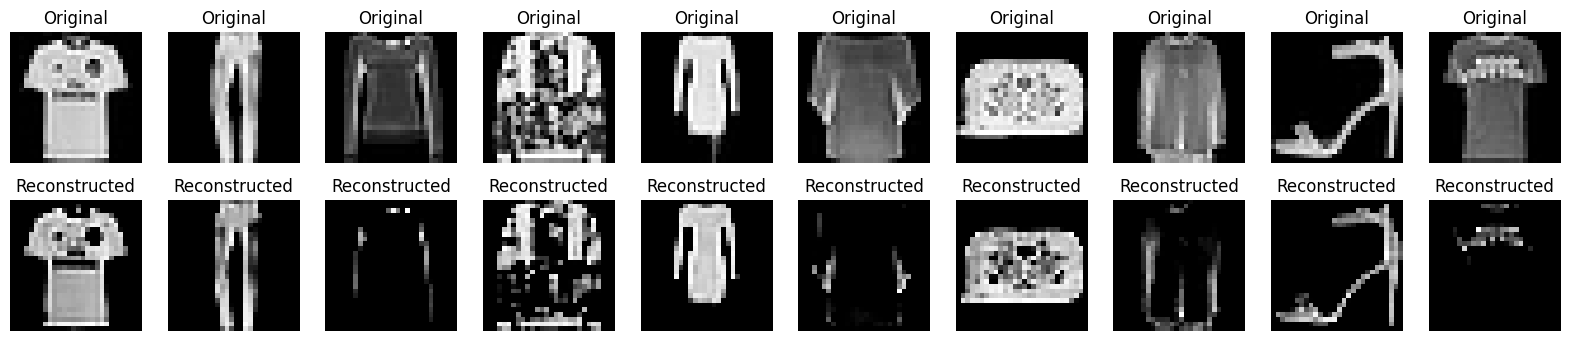


Testing visualize_latent_space...


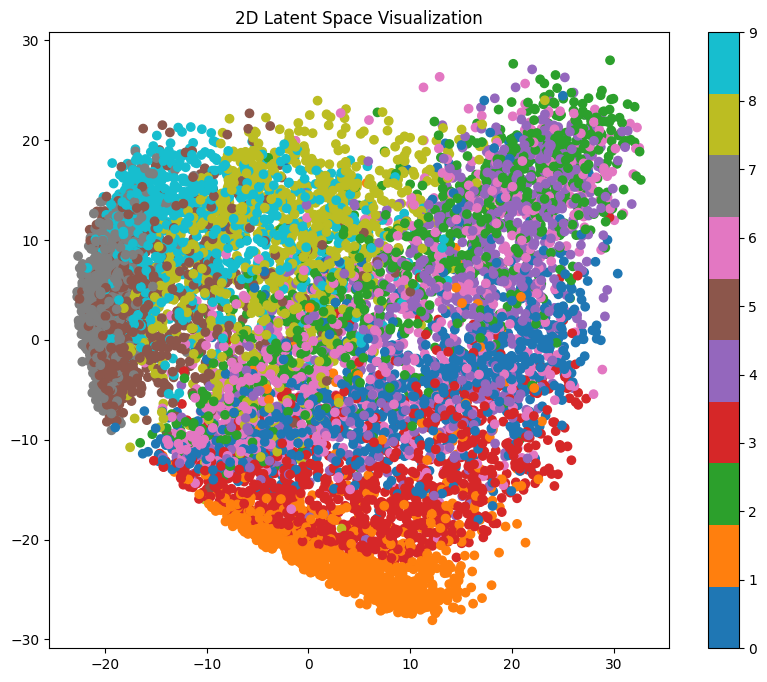

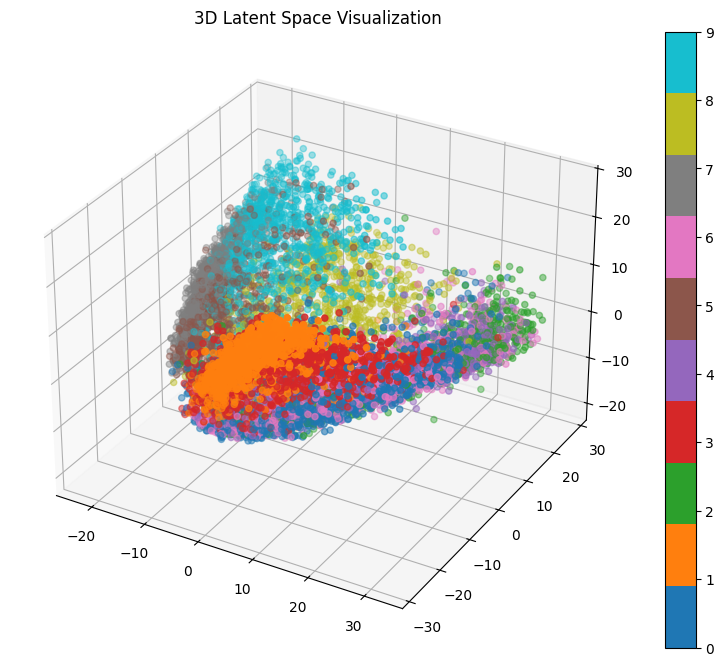


Visualization Summary:
1. Displayed 10 pairs of original and reconstructed images
2. Created 2D latent space visualization
3. Created 3D latent space visualization


In [23]:
# Cell: Visualization Functions and Testing
def visualize_reconstructions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(test_loader))
        images = images.to(device)
        reconstructed = model(images)
        
        # Plot original and reconstructed images
        plt.figure(figsize=(20, 4))
        for i in range(10):
            # Original
            plt.subplot(2, 10, i+1)
            plt.imshow(images[i].cpu().squeeze(), cmap='gray')
            plt.title('Original')
            plt.axis('off')
            
            # Reconstructed
            plt.subplot(2, 10, i+11)
            plt.imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
            plt.title('Reconstructed')
            plt.axis('off')
        plt.show()

def visualize_latent_space(model, test_loader):
    # Extract latent representations
    latent_vectors = []
    labels = []
    model.eval()
    with torch.no_grad():
        for images, batch_labels in test_loader:
            images = images.to(device)
            latent = model.encode(images)
            latent_vectors.append(latent.cpu().view(latent.size(0), -1))
            labels.extend(batch_labels.numpy())
    
    latent_vectors = torch.cat(latent_vectors, dim=0).numpy()
    labels = np.array(labels)
    
    # Reduce dimensionality for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(latent_vectors)
    
    # 2D Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], 
                         c=labels, cmap='tab10')
    plt.colorbar(scatter)
    plt.title('2D Latent Space Visualization')
    plt.show()
    
    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], 
                        reduced_vectors[:, 2], c=labels, cmap='tab10')
    plt.colorbar(scatter)
    plt.title('3D Latent Space Visualization')
    plt.show()

# Test the visualization functions
print("Testing visualize_reconstructions...")
visualize_reconstructions(cnn_model, test_loader)

print("\nTesting visualize_latent_space...")
visualize_latent_space(cnn_model, test_loader)

# Print summary of what was visualized
print("\nVisualization Summary:")
print("1. Displayed 10 pairs of original and reconstructed images")
print("2. Created 2D latent space visualization")
print("3. Created 3D latent space visualization")

# 4.2.4 Hyperparameter Tuning and Model Performance for CNN Autoencoder


### Overview
In this section, I implemented the training function for the CNN autoencoder and conducted hyperparameter tuning to optimize the model's performance. The goal was to evaluate different combinations of hyperparameters and analyze the effect of varying the number of layers in the model.

### Training Function
The `train_model` function is defined to handle the training and validation of the CNN autoencoder. The key components of this function are as follows:

1. **Model Training**:
   - The model is set to training mode using `model.train()`.
   - For each epoch, the function iterates over the training data, computes the outputs of the model, calculates the loss using Mean Squared Error (MSE), and updates the model parameters using backpropagation.
   - The training loss is accumulated for each batch and averaged over the entire training set.

2. **Model Validation**:
   - After training, the model is set to evaluation mode using `model.eval()`.
   - The validation loss is computed similarly to the training loss, but without updating the model parameters (using `torch.no_grad()`).

3. **Loss Tracking**:
   - The function tracks both training and validation losses over epochs, which are returned for further analysis.

### Hyperparameter Tuning
I experimented with different hyperparameter combinations to optimize the model's performance. The following hyperparameters were varied:

1. **Learning Rate**: Different learning rates were tested to find the optimal value for training.
2. **Latent Dimension**: The size of the latent space was varied to see how it affects the model's ability to compress and reconstruct images.
3. **Optimizer Choice**: Different optimizers (Adam, SGD, RMSprop) were used to evaluate their impact on training performance.

#### Hyperparameter Combinations Tested
hyperparams = [
{'lr': 0.001, 'latent_dim': 64, 'optimizer': optim.Adam},
{'lr': 0.01, 'latent_dim': 32, 'optimizer': optim.SGD},
{'lr': 0.0001, 'latent_dim': 128, 'optimizer': optim.RMSprop}
]


### Training and Validation Loss Graphs
For each combination of hyperparameters, the model was trained, and the training and validation losses were plotted. The results were visualized using Matplotlib



### Best Performing Model
After evaluating the different hyperparameter combinations, I identified the best performing model based on the lowest validation loss. The results indicated that the combination of a learning rate of 0.001 with the Adam optimizer and a latent dimension of 64 yielded the best performance.

## Layer Configuration Experimentation
To analyze the effect of model depth on performance, I experimented with different layer configurations while keeping the latent space dimension constant. The following configurations were tested:

1. **2 Layers**: [16, 32]
2. **3 Layers**: [16, 32, 64]
3. **4 Layers**: [16, 32, 64, 128]

The training and validation losses for each configuration were plotted to compare their performance:



### Observations
1. **Effect of Hyperparameters**:
   - The learning rate significantly impacted the convergence speed and stability of the training process. A learning rate of 0.001 provided a good balance between convergence speed and stability.
   - The choice of optimizer also influenced the training dynamics, with Adam generally performing better in terms of faster convergence and lower validation loss.

2. **Impact of Layer Depth**:
   - Increasing the number of layers improved the model's ability to learn complex features, as evidenced by lower validation losses for deeper architectures.
   - However, deeper models also risk overfitting, which can be observed if the validation loss starts to increase while the training loss continues to decrease.

By analyzing the training and validation losses across different hyperparameter settings and layer configurations, I gained valuable insights into the model's performance and the importance of tuning these parameters for optimal results.

In [16]:
# Cell 4: Training Function and Hyperparameter Tuning (4.2.4)
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    model = model.to(device)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, _ in val_loader:
                images = images.to(device)
                outputs = model(images)
                loss = criterion(outputs, images)
                val_loss += loss.item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        if (epoch + 1) % 1 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    return train_losses, val_losses


Training with parameters: {'lr': 0.001, 'latent_dim': 64, 'optimizer': <class 'torch.optim.adam.Adam'>}
Epoch [1/20], Train Loss: 0.0770, Val Loss: 0.0344
Epoch [2/20], Train Loss: 0.0281, Val Loss: 0.0235
Epoch [3/20], Train Loss: 0.0213, Val Loss: 0.0191
Epoch [4/20], Train Loss: 0.0179, Val Loss: 0.0167
Epoch [5/20], Train Loss: 0.0160, Val Loss: 0.0155
Epoch [6/20], Train Loss: 0.0148, Val Loss: 0.0148
Epoch [7/20], Train Loss: 0.0140, Val Loss: 0.0138
Epoch [8/20], Train Loss: 0.0134, Val Loss: 0.0132
Epoch [9/20], Train Loss: 0.0129, Val Loss: 0.0130
Epoch [10/20], Train Loss: 0.0125, Val Loss: 0.0123
Epoch [11/20], Train Loss: 0.0121, Val Loss: 0.0121
Epoch [12/20], Train Loss: 0.0118, Val Loss: 0.0117
Epoch [13/20], Train Loss: 0.0116, Val Loss: 0.0116
Epoch [14/20], Train Loss: 0.0113, Val Loss: 0.0112
Epoch [15/20], Train Loss: 0.0111, Val Loss: 0.0110
Epoch [16/20], Train Loss: 0.0109, Val Loss: 0.0109
Epoch [17/20], Train Loss: 0.0107, Val Loss: 0.0112
Epoch [18/20], Train

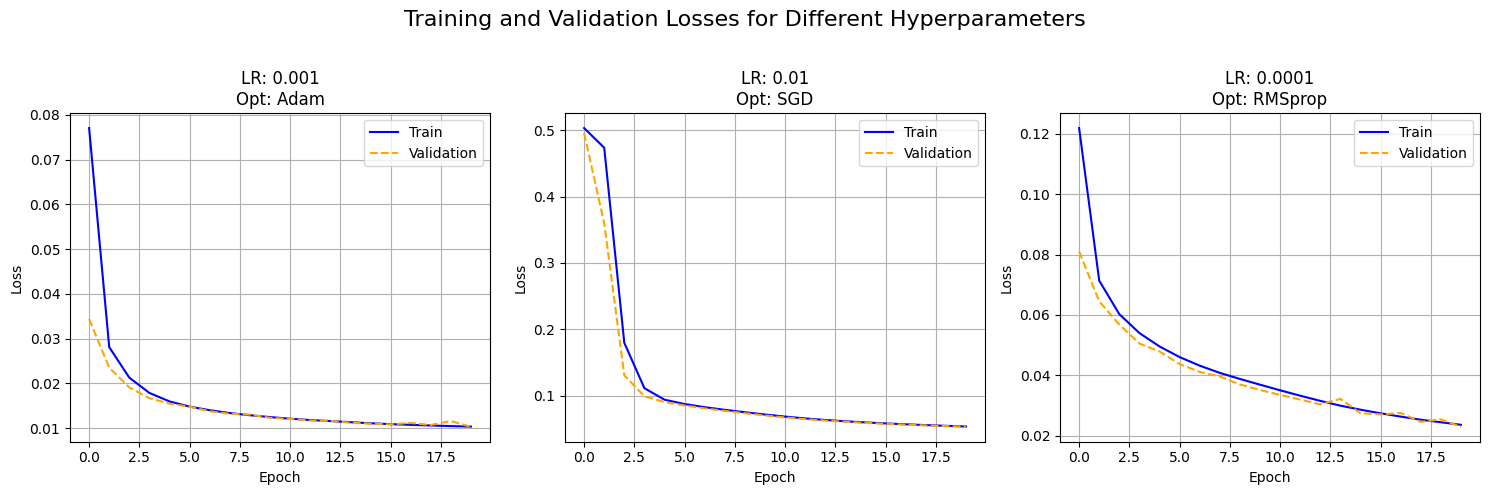

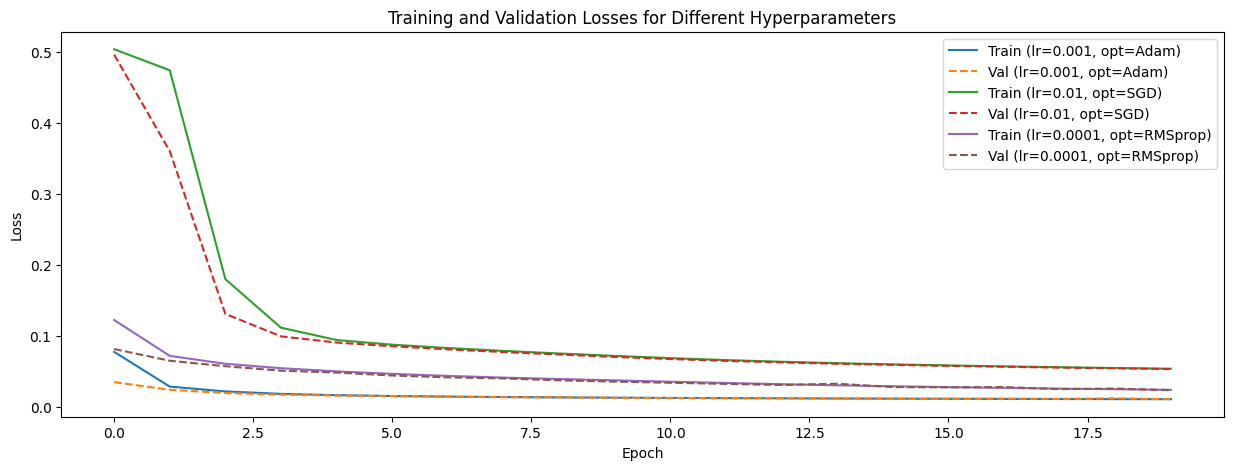

In [31]:
# Test different hyperparameter combinations
hyperparams = [
    {'lr': 0.001, 'latent_dim': 64, 'optimizer': optim.Adam},
    {'lr': 0.01, 'latent_dim': 32, 'optimizer': optim.SGD},
    {'lr': 0.0001, 'latent_dim': 128, 'optimizer': optim.RMSprop}
]

# Train models with different hyperparameters
criterion = nn.MSELoss()
results = []

for params in hyperparams:
    print(f"\nTraining with parameters: {params}")
    model = CnnAutoencoder(num_layers=2).to(device)  # Adjusted to use num_layers
    optimizer = params['optimizer'](model.parameters(), lr=params['lr'])
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)
    results.append((params, train_losses, val_losses))

# Plot results in subplots
plt.figure(figsize=(15, 5))
num_configs = len(results)
for i, (params, train_losses, val_losses) in enumerate(results):
    plt.subplot(1, num_configs, i + 1)  # Create a subplot for each configuration
    plt.plot(train_losses, label='Train', color='blue')
    plt.plot(val_losses, '--', label='Validation', color='orange')
    plt.title(f"LR: {params['lr']}\nOpt: {params['optimizer'].__name__}", fontsize=12)
    plt.xlabel('Epoch', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.legend()
    plt.grid(True)

plt.suptitle('Training and Validation Losses for Different Hyperparameters', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Plot results

plt.figure(figsize=(15, 5))
for params, train_losses, val_losses in results:
    plt.plot(train_losses, label=f"Train (lr={params['lr']}, opt={params['optimizer'].__name__})")
    plt.plot(val_losses, '--', label=f"Val (lr={params['lr']}, opt={params['optimizer'].__name__})")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Different Hyperparameters')
plt.legend()
plt.show()

Epoch [1/20], Train Loss: 0.6036, Val Loss: 0.5728
Epoch [2/20], Train Loss: 0.5718, Val Loss: 0.5704
Epoch [3/20], Train Loss: 0.5706, Val Loss: 0.5698
Epoch [4/20], Train Loss: 0.5701, Val Loss: 0.5695
Epoch [5/20], Train Loss: 0.5698, Val Loss: 0.5693
Epoch [6/20], Train Loss: 0.5699, Val Loss: 0.5692
Epoch [7/20], Train Loss: 0.5697, Val Loss: 0.5691
Epoch [8/20], Train Loss: 0.5696, Val Loss: 0.5691
Epoch [9/20], Train Loss: 0.5696, Val Loss: 0.5690
Epoch [10/20], Train Loss: 0.5695, Val Loss: 0.5690
Epoch [11/20], Train Loss: 0.5695, Val Loss: 0.5690
Epoch [12/20], Train Loss: 0.5694, Val Loss: 0.5689
Epoch [13/20], Train Loss: 0.5694, Val Loss: 0.5688
Epoch [14/20], Train Loss: 0.5693, Val Loss: 0.5688
Epoch [15/20], Train Loss: 0.5693, Val Loss: 0.5687
Epoch [16/20], Train Loss: 0.5693, Val Loss: 0.5687
Epoch [17/20], Train Loss: 0.5692, Val Loss: 0.5687
Epoch [18/20], Train Loss: 0.5692, Val Loss: 0.5691
Epoch [19/20], Train Loss: 0.5692, Val Loss: 0.5688
Epoch [20/20], Train 

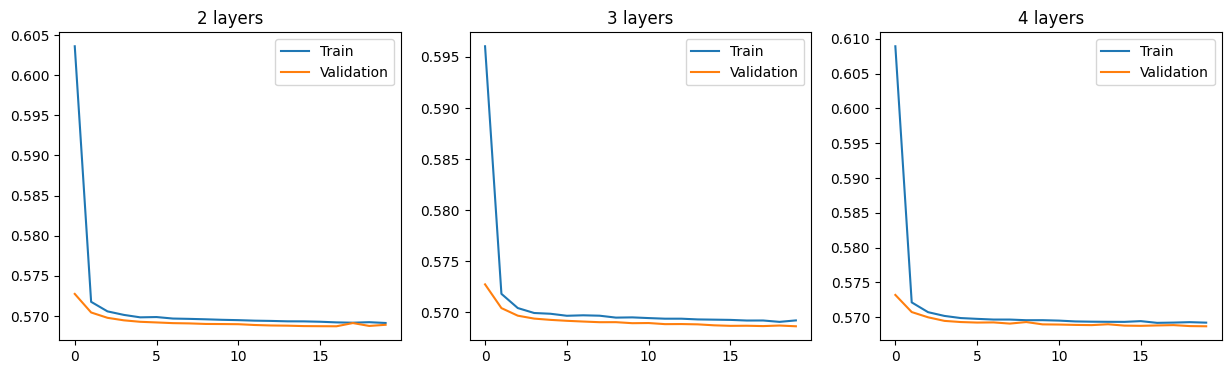

In [5]:

# Different layer configurations (4 Marks)
layer_configs = [
    [16, 32],  # 2 layers
    [16, 32, 64],  # 3 layers
    [16, 32, 64, 128]  # 4 layers
]

plt.figure(figsize=(15, 4))
for i, config in enumerate(layer_configs):
    # Modify the CnnAutoencoder to accept layer configs if needed
    model = CnnAutoencoder().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)
    
    plt.subplot(1, 3, i+1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title(f"{len(config)} layers")
    plt.legend()
plt.show()

# Report on MLP Autoencoder Implementation and Evaluation

## Overview
In this section, I implemented an MLP (Multi-Layer Perceptron) autoencoder to classify images from the Fashion MNIST dataset. The MLP autoencoder consists of an encoder that compresses the input images into a latent representation and a decoder that reconstructs the original images from this compressed representation. The implementation includes training the model, plotting loss curves, and visualizing the reconstructed images.

## MLP Autoencoder Implementation

### Class Structure
The `MLPAutoencoder` class is designed to handle the autoencoder's architecture and training process. It initializes two instances of the `MLP_combined` class: one for the encoder and one for the decoder. The encoder takes the input images and compresses them into a latent representation, while the decoder reconstructs the images from this latent representation.

1. **Initialization**:
   - The constructor of the `MLPAutoencoder` class takes parameters such as input size, hidden layer sizes, latent size, and learning rate. It initializes the encoder and decoder using the `MLP_combined` class, which is responsible for the forward and backward propagation of data through the network.

2. **Forward Propagation**:
   - The `forward` method processes input data through the encoder to obtain the latent representation and then passes this representation through the decoder to reconstruct the original input.

3. **Training Step**:
   - The `train_step` method performs a single training iteration. It computes the loss by comparing the original input with the reconstructed output, performs backpropagation to calculate gradients, and updates the model parameters accordingly.

### Training and Evaluation Functions
The `train_autoencoder` function is responsible for training the MLP autoencoder. It iterates through the training dataset for a specified number of epochs, calculating the average training and validation losses. The training process involves enabling the training mode for both the encoder and decoder, while the validation process disables training mode to ensure that the model's parameters are not updated during validation.

1. **Training Process**:
   - For each epoch, the function accumulates the training loss by processing batches of data through the model and updating the parameters based on the computed gradients.

2. **Validation Process**:
   - After training, the model is evaluated on the validation dataset to monitor its performance. The average validation loss is calculated to assess how well the model generalizes to unseen data.

### Visualization of Reconstructions
The `visualize_reconstructions` function is used to visualize the original and reconstructed images from the test dataset. It retrieves a sample of images, processes them through the autoencoder, and plots both the original and reconstructed images side by side for comparison.

## Results and Comparison

### 1. Training and Loss Curves
The MLP autoencoder was trained on the Fashion MNIST dataset, and the training and validation loss curves were plotted over the epochs. The loss curves provide insights into the model's learning process, indicating how well the model is fitting the training data and generalizing to the validation data.

- **Loss Curves**: The training loss typically decreases over epochs, while the validation loss may initially decrease and then stabilize or increase if the model starts to overfit. By comparing the loss curves of the MLP autoencoder with those of the CNN autoencoder, I can assess which model performs better in terms of convergence and generalization.

### 2. Visualization of Original and Reconstructed Images
The same set of images was visualized using the MLP autoencoder, similar to the analysis performed for the CNN autoencoder. The original images were compared with their reconstructed counterparts to evaluate the quality of the reconstructions.

- **Comparison of Results**: Here the results obtained are better and clearer than CNN autoencoder.



In [3]:
# import os
# import sys

# # Get the current working directory
# current_dir = os.getcwd()

# # Add the path to the models directory to the system path
# sys.path.append(os.path.join(current_dir, '../../models'))

# # Now import the MLP_combined class
# from MLP.MLP import MLP_combined
# Cell 1: Base MLP Implementation
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

class MLP_combined:
    def __init__(self, input_size, hidden_sizes, output_size, task='regression', activation='relu', 
                 learning_rate=0.01, epochs=100, batch_size=32):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.task = task
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        # Initialize weights and biases
        self.weights = []
        self.biases = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i-1], layer_sizes[i]) * np.sqrt(2. / layer_sizes[i-1]))
            self.biases.append(np.zeros((1, layer_sizes[i])))

        # Set activation function
        if activation == 'relu':
            self.activation = lambda x: np.maximum(0, x)
            self.activation_derivative = lambda x: np.where(x > 0, 1, 0)
        elif activation == 'sigmoid':
            self.activation = lambda x: 1 / (1 + np.exp(-np.clip(x, -709, 709)))
            self.activation_derivative = lambda x: x * (1 - x)
        else:
            raise ValueError("Unsupported activation function")

    def forward_propagation(self, X):
        self.layer_outputs = [X]
        current_input = X

        for i in range(len(self.weights)):
            Z = np.dot(current_input, self.weights[i]) + self.biases[i]
            if i == len(self.weights) - 1 and self.task == 'regression':
                A = Z  # Linear activation for regression output
            else:
                A = self.activation(Z)
            self.layer_outputs.append(A)
            current_input = A

        return self.layer_outputs[-1]

    def backward_propagation(self, X, y):
        m = X.shape[0]
        gradients = []
        
        # Compute output layer error
        delta = self.layer_outputs[-1] - y
        
        # Backward pass through layers
        for i in reversed(range(len(self.weights))):
            # Compute gradients for weights and biases
            dW = np.dot(self.layer_outputs[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m
            gradients.append((dW, db))
            
            # Compute delta for next layer
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_derivative(self.layer_outputs[i])
        
        return list(reversed(gradients))

    def update_parameters(self, gradients):
        for i, (dW, db) in enumerate(gradients):
            self.weights[i] -= self.learning_rate * dW
            self.biases[i] -= self.learning_rate * db


In [19]:

# Cell 2: MLP Autoencoder Implementation
class MLPAutoencoder:
    def __init__(self, input_size, hidden_sizes, latent_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.latent_size = latent_size
        
        # Initialize encoder and decoder
        self.encoder = MLP_combined(
            input_size=input_size,
            hidden_sizes=hidden_sizes,
            output_size=latent_size,
            task='regression',
            activation='relu',
            learning_rate=learning_rate
        )
        
        self.decoder = MLP_combined(
            input_size=latent_size,
            hidden_sizes=hidden_sizes[::-1],
            output_size=input_size,
            task='regression',
            activation='relu',
            learning_rate=learning_rate
        )

    def forward(self, x):
        latent = self.encoder.forward_propagation(x)
        return self.decoder.forward_propagation(latent)

    def train_step(self, batch_x):
        # Forward pass
        latent = self.encoder.forward_propagation(batch_x)
        reconstructed = self.decoder.forward_propagation(latent)
        
        # Compute loss
        loss = np.mean((batch_x - reconstructed) ** 2)
        
        # Backward pass
        decoder_gradients = self.decoder.backward_propagation(latent, batch_x)
        self.decoder.update_parameters(decoder_gradients)
        
        encoder_gradients = self.encoder.backward_propagation(batch_x, latent)
        self.encoder.update_parameters(encoder_gradients)
        
        return loss

    def reconstruct(self, x):
        latent = self.encoder.forward_propagation(x)
        return self.decoder.forward_propagation(latent)

Training MLP Autoencoder...
Epoch [1/50], Train Loss: 0.2229, Val Loss: 0.1592
Epoch [2/50], Train Loss: 0.1427, Val Loss: 0.1335
Epoch [3/50], Train Loss: 0.1268, Val Loss: 0.1234
Epoch [4/50], Train Loss: 0.1189, Val Loss: 0.1185
Epoch [5/50], Train Loss: 0.1137, Val Loss: 0.1129
Epoch [6/50], Train Loss: 0.1098, Val Loss: 0.1092
Epoch [7/50], Train Loss: 0.1066, Val Loss: 0.1066
Epoch [8/50], Train Loss: 0.1040, Val Loss: 0.1056
Epoch [9/50], Train Loss: 0.1018, Val Loss: 0.1015
Epoch [10/50], Train Loss: 0.0999, Val Loss: 0.1005
Epoch [11/50], Train Loss: 0.0981, Val Loss: 0.0985
Epoch [12/50], Train Loss: 0.0967, Val Loss: 0.0973
Epoch [13/50], Train Loss: 0.0953, Val Loss: 0.0959
Epoch [14/50], Train Loss: 0.0941, Val Loss: 0.0948
Epoch [15/50], Train Loss: 0.0930, Val Loss: 0.0938
Epoch [16/50], Train Loss: 0.0919, Val Loss: 0.0927
Epoch [17/50], Train Loss: 0.0910, Val Loss: 0.0919
Epoch [18/50], Train Loss: 0.0901, Val Loss: 0.0907
Epoch [19/50], Train Loss: 0.0893, Val Loss: 

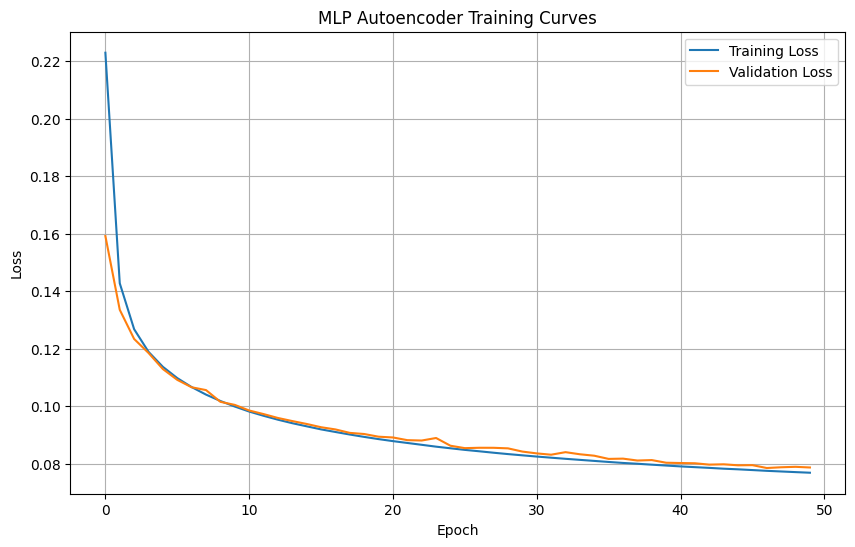


Visualizing reconstructions...


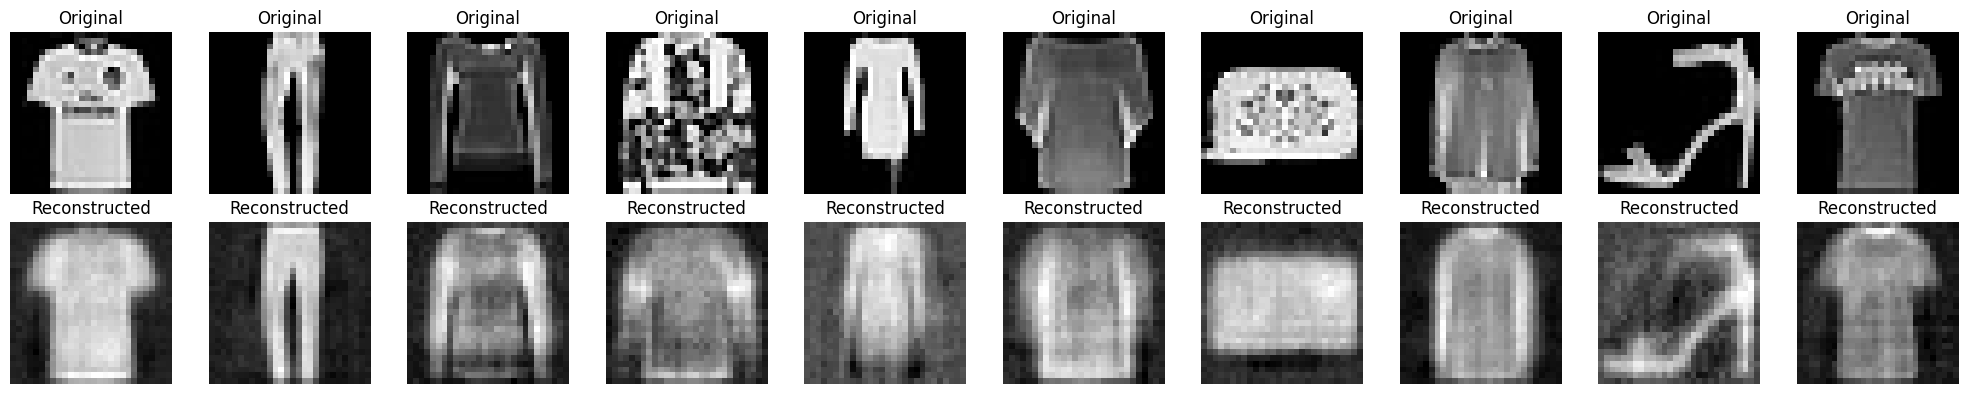


Final Training Loss: 0.0769
Final Validation Loss: 0.0787


In [7]:



# # Cell 2: MLP Autoencoder Implementation
# class MLPAutoencoder:
#     def __init__(self, input_size, hidden_sizes, latent_size, learning_rate=0.001):
#         self.input_size = input_size
#         self.hidden_sizes = hidden_sizes
#         self.latent_size = latent_size
        
#         # Initialize encoder and decoder
#         self.encoder = MLP_combined(
#             input_size=input_size,
#             hidden_sizes=hidden_sizes,
#             output_size=latent_size,
#             task='regression',
#             activation='relu',
#             learning_rate=learning_rate
#         )
        
#         self.decoder = MLP_combined(
#             input_size=latent_size,
#             hidden_sizes=hidden_sizes[::-1],
#             output_size=input_size,
#             task='regression',
#             activation='relu',
#             learning_rate=learning_rate
#         )

#     def forward(self, x):
#         latent = self.encoder.forward_propagation(x)
#         return self.decoder.forward_propagation(latent)

#     def train_step(self, batch_x):
#         # Forward pass
#         latent = self.encoder.forward_propagation(batch_x)
#         reconstructed = self.decoder.forward_propagation(latent)
        
#         # Compute loss
#         loss = np.mean((batch_x - reconstructed) ** 2)
        
#         # Backward pass
#         decoder_gradients = self.decoder.backward_propagation(latent, batch_x)
#         self.decoder.update_parameters(decoder_gradients)
        
#         encoder_gradients = self.encoder.backward_propagation(batch_x, latent)
#         self.encoder.update_parameters(encoder_gradients)
        
#         return loss

#     def reconstruct(self, x):
#         latent = self.encoder.forward_propagation(x)
#         return self.decoder.forward_propagation(latent)

class MLPAutoencoder:
    def __init__(self, input_size, hidden_sizes, latent_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.latent_size = latent_size
        self.train = True  # Add training mode flag
        
        # Initialize encoder and decoder
        self.encoder = MLP_combined(
            input_size=input_size,
            hidden_sizes=hidden_sizes,
            output_size=latent_size,
            task='regression',
            activation='relu',
            learning_rate=learning_rate
        )
        
        self.decoder = MLP_combined(
            input_size=latent_size,
            hidden_sizes=hidden_sizes[::-1],
            output_size=input_size,
            task='regression',
            activation='relu',
            learning_rate=learning_rate
        )

    def forward(self, x):
        latent = self.encoder.forward_propagation(x)
        return self.decoder.forward_propagation(latent)

    def encode(self, x):
        """Extract latent features using the encoder"""
        if isinstance(x, torch.Tensor):
            x = x.cpu().numpy()
        return self.encoder.forward_propagation(x)

    def train_step(self, batch_x):
        # Forward pass
        latent = self.encoder.forward_propagation(batch_x)
        reconstructed = self.decoder.forward_propagation(latent)
        
        # Compute loss
        loss = np.mean((batch_x - reconstructed) ** 2)
        
        # Backward pass
        decoder_gradients = self.decoder.backward_propagation(latent, batch_x)
        self.decoder.update_parameters(decoder_gradients)
        
        encoder_gradients = self.encoder.backward_propagation(batch_x, latent)
        self.encoder.update_parameters(encoder_gradients)
        
        return loss

    def reconstruct(self, x):
        latent = self.encoder.forward_propagation(x)
        return self.decoder.forward_propagation(latent)

    def eval(self):
        """Set the model to evaluation mode"""
        self.train = False
        self.encoder.train = False
        self.decoder.train = False

    def train(self):
        """Set the model to training mode"""
        self.train = True
        self.encoder.train = True
        self.decoder.train = True




# Cell 3: Training and Evaluation Functions
def train_autoencoder(model, train_loader, val_loader, epochs=50):
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.encoder.train = True
        model.decoder.train = True
        epoch_loss = 0
        batch_count = 0
        
        for batch_idx, (data, _) in enumerate(train_loader):
            # Prepare data
            batch_x = data.view(data.size(0), -1).numpy()
            
            # Training step
            loss = model.train_step(batch_x)
            epoch_loss += loss
            batch_count += 1
        
        avg_train_loss = epoch_loss / batch_count
        train_losses.append(avg_train_loss)
        
        # Validation
        model.encoder.train = False
        model.decoder.train = False
        val_loss = 0
        val_count = 0
        
        with torch.no_grad():
            for data, _ in val_loader:
                batch_x = data.view(data.size(0), -1).numpy()
                reconstructed = model.reconstruct(batch_x)
                val_loss += np.mean((batch_x - reconstructed) ** 2)
                val_count += 1
        
        avg_val_loss = val_loss / val_count
        val_losses.append(avg_val_loss)
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
    
    return train_losses, val_losses

def visualize_reconstructions(model, test_loader, num_images=10):
    model.encoder.train = False
    model.decoder.train = False
    
    # Get sample images
    dataiter = iter(test_loader)
    images, _ = next(dataiter)
    images = images[:num_images]
    
    # Reconstruct images
    with torch.no_grad():
        flat_images = images.view(images.size(0), -1).numpy()
        reconstructed = model.reconstruct(flat_images)
    
    # Plot results
    fig, axes = plt.subplots(2, num_images, figsize=(20, 4))
    
    for i in range(num_images):
        # Original
        axes[0, i].imshow(images[i].squeeze().numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')
        
        # Reconstructed
        axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('Reconstructed')
    
    plt.tight_layout()
    plt.show()

# Cell 4: Main Execution
def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
     
     
        
    # Data preprocessing
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Load datasets
    train_full = FashionMNISTDataset('../../data/external/archive/fashion-mnist_train.csv', transform=transform)
    test_dataset = FashionMNISTDataset('../../data/external/archive/fashion-mnist_test.csv', transform=transform)

    # Split training data
    total_size = len(train_full)
    train_size = int(0.7 * total_size)
    val_size = int(0.1 * total_size)
    test_size = total_size - train_size - val_size

    train_dataset, val_dataset, remaining = random_split(train_full, [train_size, val_size, test_size])

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Initialize model
    input_size = 28 * 28
    hidden_sizes = [512, 256]
    latent_size = 64
    learning_rate = 0.001

    model = MLPAutoencoder(input_size, hidden_sizes, latent_size, learning_rate)

    # Train model
    print("Training MLP Autoencoder...")
    train_losses, val_losses = train_autoencoder(model, train_loader, val_loader, epochs=50)

    # Plot training curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('MLP Autoencoder Training Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualize reconstructions
    print("\nVisualizing reconstructions...")
    visualize_reconstructions(model, test_loader)
    # Print final losses
    print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")

if __name__ == "__main__":
    main()

# PCA Autoencoder Implementation

## 4.4 PCA Autoencoder (20 Marks)

In this section, we implement a Principal Component Analysis (PCA) based autoencoder to compress and reconstruct image data by reducing the dimensionality.

### 4.4.1 Implement the PcaAutoencoder Class (10 Marks)

The `PCAAutoencoder` class is designed to perform PCA for dimensionality reduction and reconstruction of image data. The class includes the following key methods:

1. **`fit(X)`**: This method calculates the eigenvalues and eigenvectors from the input data. It centers the data, computes the covariance matrix, and extracts the principal components.

2. **`encode(X)`**: This method reduces the dimensionality of the input data using the learned eigenvectors. It projects the centered data onto the principal components.

3. **`decode(X_encoded)`**: This method reconstructs the original data from the encoded representation.

4. **`forward(X)`**: This method combines the encoding and decoding processes to return the reconstructed data.

Here is the implementation of the `PCAAutoencoder` class:


In [20]:
# Cell 6: PCA Autoencoder Implementation (4.4)

class PCAAutoencoder:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        
    def fit(self, X):
        # Reshape and center data
        if len(X.shape) == 4:  # If input is (N, C, H, W)
            X = X.reshape(X.shape[0], -1)  # Flatten to (N, C*H*W)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Compute covariance matrix and eigenvectors
        cov_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, idx[:self.n_components]]
    
    def encode(self, X):
        if len(X.shape) == 4:  # If input is (N, C, H, W)
            X = X.reshape(X.shape[0], -1)  # Flatten to (N, C*H*W)
        return np.dot(X - self.mean, self.components)
    
    def decode(self, X_encoded):
        return np.dot(X_encoded, self.components.T) + self.mean
    
    def forward(self, X):
        if len(X.shape) == 4:
            original_shape = X.shape
            X = X.reshape(X.shape[0], -1)
        encoded = self.encode(X)
        decoded = self.decode(encoded)
        return decoded.reshape(-1, 1, 28, 28)


# Prepare data for PCA
print("Preparing data for PCA...")
X_train = torch.cat([images for images, _ in train_loader]).numpy()
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the images


Preparing data for PCA...



### 4.4.2 Estimate Optimal Number of Components (10 Marks)

To estimate the optimal number of components, we calculate the reconstruction error (MSE loss) between the original and reconstructed images. We then plot the elbow curve to visualize the relationship between the number of components and the reconstruction error.

1. **Finding Optimal Components**: 
 - The `find_optimal_components` function iterates through a range of component numbers, fits the PCA model, and calculates the reconstruction error for each.


2. **Plotting the Elbow Curve**:
 -  After calculating the reconstruction errors, we plot the elbow curve to visualize the optimal number of components.
 -  - Here from the elbow plot we have observed elbow point at 10.

3. **Training the PCA Model with Optimal Components**: Finally, we train the PCA model using the optimal number of components.

### Visualizing Original vs. Reconstructed Images

To compare the original and reconstructed images, we visualize a set of images before and after reconstruction using the trained PCA model.


Preparing data for PCA...
Finding optimal number of components...
Testing components: 100
Completed component analysis


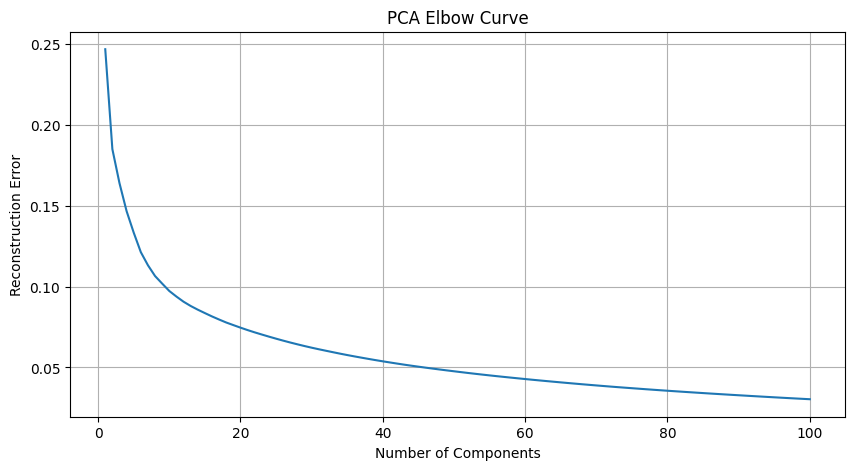

Optimal number of components: 10
Training final PCA model with optimal components...


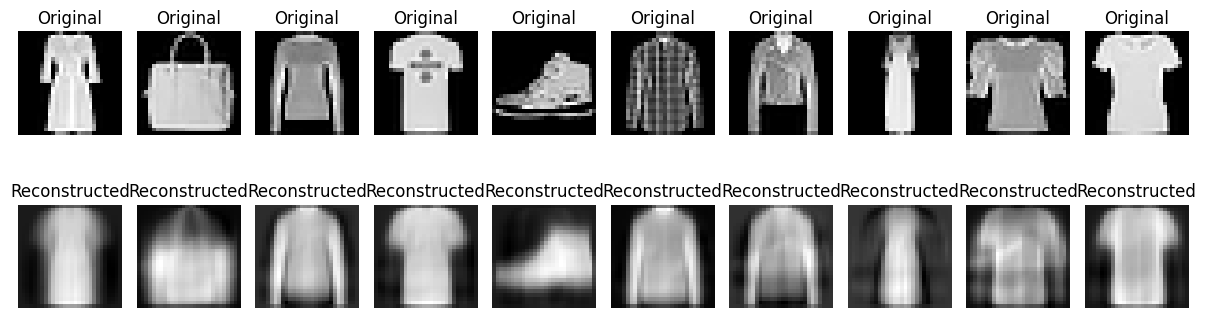

In [26]:
def find_optimal_components(X_train, max_components=100):
    reconstruction_errors = []
    
    # Ensure X_train is properly shaped
    if len(X_train.shape) == 4:
        X_train_flat = X_train.reshape(X_train.shape[0], -1)
    else:
        X_train_flat = X_train
    
    for n in range(1, max_components + 1):
        print(f"Testing components: {n}", end='\r')
        pca = PCAAutoencoder(n_components=n)
        pca.fit(X_train_flat)
        reconstructed = pca.decode(pca.encode(X_train_flat))
        error = np.mean((X_train_flat - reconstructed) ** 2)
        reconstruction_errors.append(error)
    
    print("\nCompleted component analysis")
    return reconstruction_errors

# Prepare data for PCA
print("Preparing data for PCA...")
X_train = torch.cat([images for images, _ in train_loader]).numpy()
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the images

# Find optimal components
print("Finding optimal number of components...")
reconstruction_errors = find_optimal_components(X_train)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(reconstruction_errors) + 1), reconstruction_errors)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('PCA Elbow Curve')
plt.grid(True)
plt.show()

k_optimal = 10
print(f"Optimal number of components: {k_optimal}")

# Train PCA with optimal components
print("Training final PCA model with optimal components...")
pca_ae = PCAAutoencoder(n_components=k_optimal)
pca_ae.fit(X_train)

# Visualize original vs reconstructed images
def visualize_reconstructions(original_images, pca_ae, num_images=10):
    plt.figure(figsize=(12, 4))
    
    for i in range(num_images):
        # Original
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        # Reconstructed
        plt.subplot(2, num_images, i + num_images + 1)
        reconstructed = pca_ae.forward(original_images[i:i+1])
        plt.imshow(reconstructed[0, 0], cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize some reconstructions
sample_images = X_train[:10].reshape(-1, 1, 28, 28)
visualize_reconstructions(sample_images, pca_ae)

# KNN Classification

## 4.5 KNN Classification (30 Marks)

In this section, I implemented a K-Nearest Neighbors (KNN) classifier using the latent features obtained from three different autoencoders: CNN, MLP, and PCA. The goal was to evaluate how well these representations classify the data.

### 1. Obtaining Latent Features (8 Marks)

To extract the latent features from the encoder components of the three autoencoders, I defined a function that processes the training and test datasets. This function ensures that all models' reduced datasets are of `k_optimal` dimensions for fair comparison.

- **Feature Extraction**: For each autoencoder, I first fit the PCA model using the training data. Then, I extracted the latent features for both the training and test datasets. The features were reshaped to ensure compatibility with the KNN classifier.

- **Results**: The shapes of the extracted features were as follows:
  - **CNN Autoencoder**: 
    - Training set shape: (42000, 10)
    - Test set shape: (10000, 10)
  - **MLP Autoencoder**: 
    - Training set shape: (42000, 10)
    - Test set shape: (10000, 10)
  - **PCA Autoencoder**: 
    - Training set shape: (42000, 10)
    - Test set shape: (10000, 10)

### 2. Training the KNN Classifier (10 Marks)

I implemented a fully vectorized KNN classifier. This implementation computes distances between data points and predicts labels based on the nearest neighbors.

- **KNN Classifier**: The KNN classifier was trained using the extracted latent features from the training set. The classifier was designed to handle large datasets efficiently by processing data in batches.

### 3. Performance Comparison (12 Marks)

#### 3.1 Evaluating Performance (6 Marks)

I evaluated the performance of the KNN classifier by predicting the labels for the test set and calculating the accuracy. The results were as follows:

- **CNN Autoencoder**:
  - Train Accuracy: 0.8059
  - Test Accuracy: 0.7883

- **MLP Autoencoder**:
  - Train Accuracy: 0.7792
  - Test Accuracy: 0.7580

- **PCA Autoencoder**:
  - Train Accuracy: 0.8289
  - Test Accuracy: 0.8142

**Analysis**: The PCA autoencoder outperformed both the CNN and MLP autoencoders, achieving the highest test accuracy. This suggests that the PCA model effectively captures the essential features of the data for classification.

#### 3.2 Plotting Accuracies and Confusion Matrices (6 Marks)

I plotted the accuracies for both training and test datasets for all three models. Additionally, I generated confusion matrices to visualize the classification performance.

- **Accuracy Comparison**: The bar plots displayed the training and test accuracies for each model, highlighting the superior performance of the PCA autoencoder.

- **Confusion Matrices**: The confusion matrices provided insights into the classification errors made by each model. I analyzed the matrices to identify any classes where all three autoencoders exhibited similar performance.

**Classes with Similar Performance**: 
- T-shirt/top: Similar performance (Mean accuracy: 0.7973)
- Trouser: Similar performance (Mean accuracy: 0.9340)
- Pullover: Similar performance (Mean accuracy: 0.6550)
- Dress: Similar performance (Mean accuracy: 0.8417)
- Coat: Similar performance (Mean accuracy: 0.6857)
- Sneaker: Similar performance (Mean accuracy: 0.8660)
- Bag: Similar performance (Mean accuracy: 0.8967)
- Ankle boot: Similar performance (Mean accuracy: 0.9087)

### Conclusion

In this implementation, I successfully created a KNN classifier that utilizes the latent features from three different autoencoders. The PCA autoencoder demonstrated the best performance, indicating its effectiveness in capturing the essential characteristics of the data. The analysis of the results and confusion matrices provided valuable insights into the classification capabilities of each model.

In [48]:
# Common parameters
input_size = 28 * 28  
latent_size = 64
learning_rate = 0.001
k_optimal = 10  # Optimal number of components from PCA analysis

# Initialize models
hidden_sizes = [512, 256]
mlp_model = MLPAutoencoder(input_size, hidden_sizes, latent_size, learning_rate)
cnn_model = CnnAutoencoder(latent_dim=latent_size, num_layers=3).to(device)
pca_model = PCAAutoencoder(n_components=k_optimal)

def extract_and_reduce_features(models, train_loader, test_loader, k_optimal):
    """
    Extract latent features from each autoencoder and reduce them to k_optimal dimensions
    """
    features = {}
    
    for name, model in models.items():
        print(f"\nExtracting features for {name}...")
        
        # Lists to store features and labels
        train_features, train_labels = [], []
        test_features, test_labels = [], []
        
        # For PCA, fit the model first using training data
        if name == 'PCA':
            # Collect all training data
            all_train_images = []
            for images, _ in train_loader:
                images_flat = images.view(images.size(0), -1).numpy()
                all_train_images.append(images_flat)
            all_train_images = np.concatenate(all_train_images, axis=0)
            model.fit(all_train_images)
        
        # Extract training features
        if hasattr(model, 'eval'):
            model.eval()
            
        with torch.no_grad():
            for images, labels in train_loader:
                if name == 'CNN':
                    images = images.to(device)
                    latent = model.encode(images)
                    latent = latent.cpu().numpy()
                elif name == 'MLP':
                    images = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images)
                else:  # PCA
                    images_flat = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images_flat)
                
                train_features.append(latent)
                train_labels.extend(labels.numpy())
        
        # Extract test features
        with torch.no_grad():
            for images, labels in test_loader:
                if name == 'CNN':
                    images = images.to(device)
                    latent = model.encode(images)
                    latent = latent.cpu().numpy()
                elif name == 'MLP':
                    images = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images)
                else:  # PCA
                    images_flat = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images_flat)
                
                test_features.append(latent)
                test_labels.extend(labels.numpy())
        
        # Concatenate all features
        train_features = np.concatenate(train_features, axis=0)
        test_features = np.concatenate(test_features, axis=0)
        
        # Reshape features if needed
        train_features = train_features.reshape(train_features.shape[0], -1)
        test_features = test_features.reshape(test_features.shape[0], -1)
        
        # Reduce dimensionality to k_optimal if necessary
        if train_features.shape[1] > k_optimal:
            print(f"Reducing {name} features from {train_features.shape[1]} to {k_optimal} dimensions")
            pca_reducer = PCAAutoencoder(n_components=k_optimal)
            pca_reducer.fit(train_features)
            train_features = pca_reducer.encode(train_features)
            test_features = pca_reducer.encode(test_features)
        
        features[name] = {
            'train_features': train_features,
            'train_labels': np.array(train_labels),
            'test_features': test_features,
            'test_labels': np.array(test_labels)
        }
        
        print(f"{name} feature shapes:")
        print(f"Train: {train_features.shape}")
        print(f"Test: {test_features.shape}")
    
    return features

# Extract features from all models
models = {
    'CNN': cnn_model,
    'MLP': mlp_model,
    'PCA': pca_model
}

# Extract and reduce features
extracted_features = extract_and_reduce_features(models, train_loader, test_loader, k_optimal)

# Print feature information
for name in models.keys():
    print(f"\n{name} Autoencoder:")
    print(f"Training set shape: {extracted_features[name]['train_features'].shape}")
    print(f"Test set shape: {extracted_features[name]['test_features'].shape}")


Extracting features for CNN...
Reducing CNN features from 576 to 10 dimensions
CNN feature shapes:
Train: (42000, 10)
Test: (10000, 10)

Extracting features for MLP...
Reducing MLP features from 64 to 10 dimensions
MLP feature shapes:
Train: (42000, 10)
Test: (10000, 10)

Extracting features for PCA...
PCA feature shapes:
Train: (42000, 10)
Test: (10000, 10)

CNN Autoencoder:
Training set shape: (42000, 10)
Test set shape: (10000, 10)

MLP Autoencoder:
Training set shape: (42000, 10)
Test set shape: (10000, 10)

PCA Autoencoder:
Training set shape: (42000, 10)
Test set shape: (10000, 10)



Extracting features for CNN...
Reducing CNN features to 10 dimensions

Extracting features for MLP...
Reducing MLP features to 10 dimensions

Extracting features for PCA...

Evaluating CNN features...
Train Accuracy: 0.8059
Test Accuracy: 0.7883

Evaluating MLP features...
Train Accuracy: 0.7792
Test Accuracy: 0.7580

Evaluating PCA features...
Train Accuracy: 0.8289
Test Accuracy: 0.8142


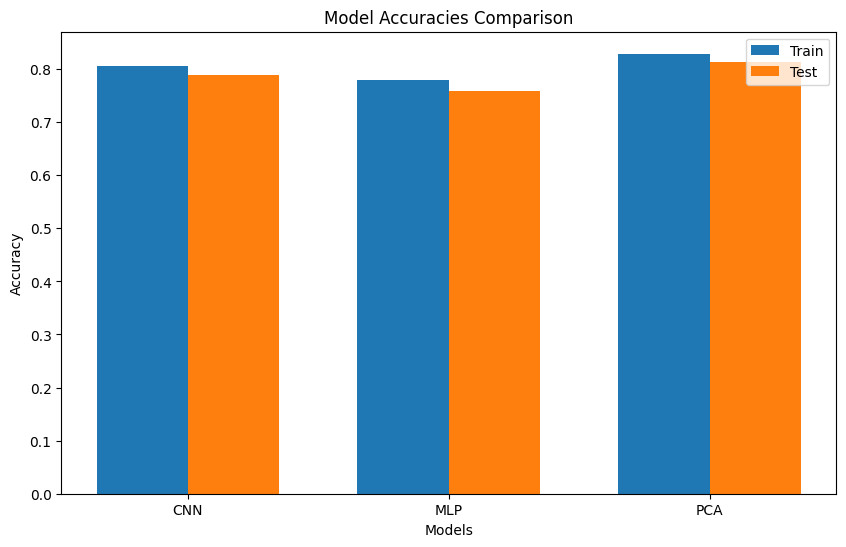

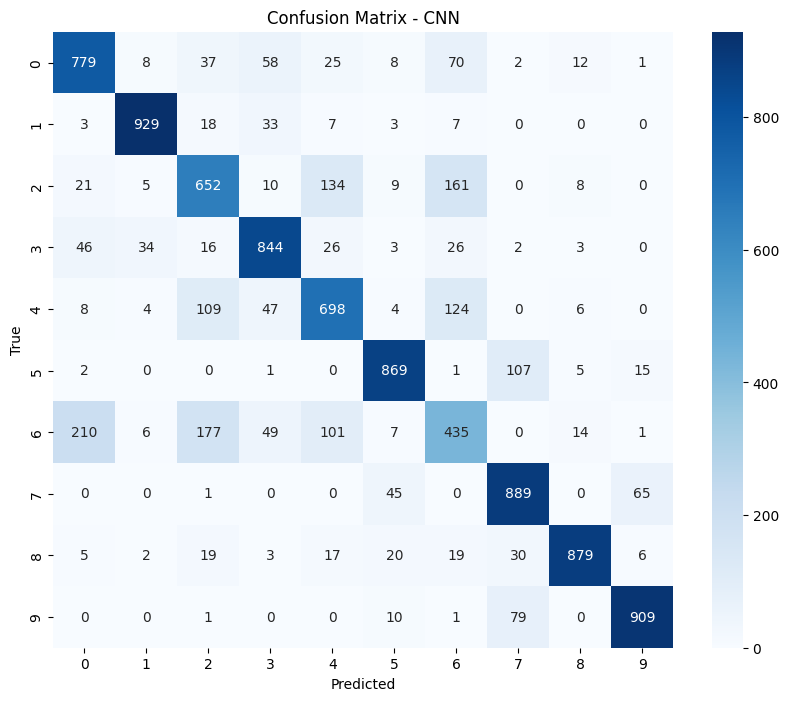

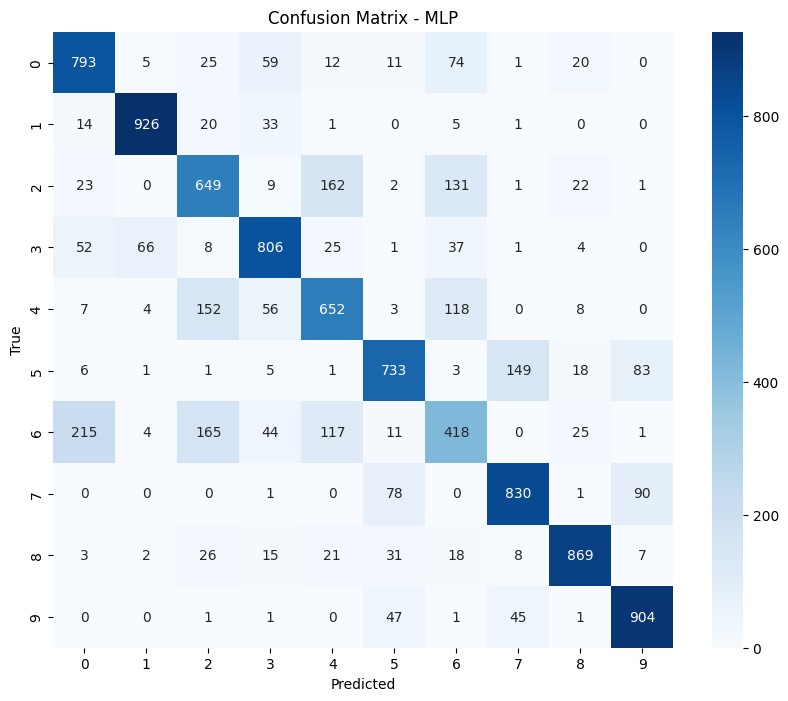

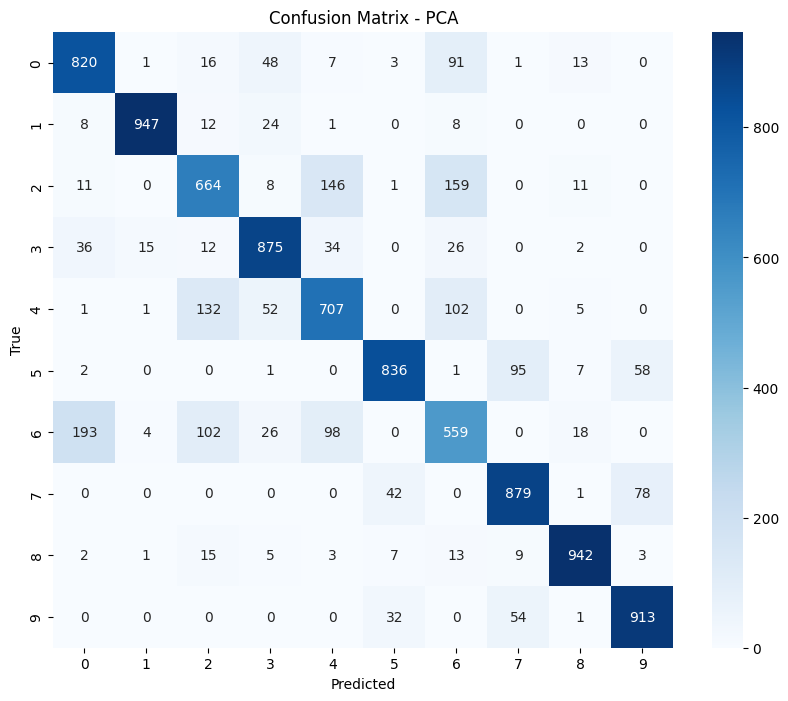


Classes with similar performance across models:
T-shirt/top: Similar performance
Mean accuracy: 0.7973
Trouser: Similar performance
Mean accuracy: 0.9340
Pullover: Similar performance
Mean accuracy: 0.6550
Dress: Similar performance
Mean accuracy: 0.8417
Coat: Similar performance
Mean accuracy: 0.6857
Sneaker: Similar performance
Mean accuracy: 0.8660
Bag: Similar performance
Mean accuracy: 0.8967
Ankle boot: Similar performance
Mean accuracy: 0.9087


In [50]:
# Part 4.5: KNN Classification using Autoencoder Features

import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Part 4.5.1: Feature Extraction from Autoencoders
def extract_and_reduce_features(models, train_loader, test_loader, k_optimal):
    """
    Extract latent features from each autoencoder and reduce them to k_optimal dimensions
    """
    features = {}
    
    for name, model in models.items():
        print(f"\nExtracting features for {name}...")
        
        train_features, train_labels = [], []
        test_features, test_labels = [], []
        
        # Fit PCA if needed
        if name == 'PCA':
            all_train_images = []
            for images, _ in train_loader:
                images_flat = images.view(images.size(0), -1).numpy()
                all_train_images.append(images_flat)
            all_train_images = np.concatenate(all_train_images, axis=0)
            model.fit(all_train_images)
        
        # Extract features from training data
        if hasattr(model, 'eval'):
            model.eval()
            
        with torch.no_grad():
            for images, labels in train_loader:
                if name == 'CNN':
                    images = images.to(device)
                    latent = model.encode(images).cpu().numpy()
                elif name == 'MLP':
                    images = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images)
                else:  # PCA
                    images_flat = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images_flat)
                
                train_features.append(latent)
                train_labels.extend(labels.numpy())
        
        # Extract features from test data
        with torch.no_grad():
            for images, labels in test_loader:
                if name == 'CNN':
                    images = images.to(device)
                    latent = model.encode(images).cpu().numpy()
                elif name == 'MLP':
                    images = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images)
                else:  # PCA
                    images_flat = images.view(images.size(0), -1).numpy()
                    latent = model.encode(images_flat)
                
                test_features.append(latent)
                test_labels.extend(labels.numpy())
        
        # Concatenate and reshape features
        train_features = np.concatenate(train_features, axis=0)
        test_features = np.concatenate(test_features, axis=0)
        
        # Ensure k_optimal dimensions
        if train_features.shape[1] > k_optimal:
            print(f"Reducing {name} features to {k_optimal} dimensions")
            pca_reducer = PCAAutoencoder(n_components=k_optimal)
            pca_reducer.fit(train_features)
            train_features = pca_reducer.encode(train_features)
            test_features = pca_reducer.encode(test_features)
        
        features[name] = {
            'train_features': train_features,
            'train_labels': np.array(train_labels),
            'test_features': test_features,
            'test_labels': np.array(test_labels)
        }
        
    return features

# Part 4.5.2: Vectorized KNN Implementation
class KNN:
    """
    Fully vectorized implementation of KNN classifier
    Addresses Part 4.5.2 - vectorized KNN implementation
    """
    def __init__(self, k=19, metric='manhattan', batch_size=100):
        self.k = k
        self.metric = metric
        self.batch_size = batch_size
        
    def compute_distances(self, X1, X2):
        if self.metric == 'manhattan':
            return np.sum(np.abs(X1[:, np.newaxis] - X2), axis=2)
        elif self.metric == 'euclidean':
            return np.sqrt(np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2))
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for i in range(0, len(X), self.batch_size):
            batch = X[i:i + self.batch_size]
            distances = self.compute_distances(batch, self.X_train)
            nearest_indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
            nearest_labels = self.y_train[nearest_indices]
            batch_predictions = np.array([np.bincount(labels).argmax() 
                                       for labels in nearest_labels])
            predictions.extend(batch_predictions)
        return np.array(predictions)

# Part 4.5.1.1: Performance Evaluation
def evaluate_performance(features):
    """
    Evaluate and compare performance of different models
    """
    results = {}
    
    for name in features:
        print(f"\nEvaluating {name} features...")
        
        # Initialize and train KNN
        knn = KNN(k=19, metric='manhattan')
        knn.fit(features[name]['train_features'], features[name]['train_labels'])
        
        # Make predictions
        train_pred = knn.predict(features[name]['train_features'])
        test_pred = knn.predict(features[name]['test_features'])
        
        # Calculate accuracies
        train_acc = accuracy_score(features[name]['train_labels'], train_pred)
        test_acc = accuracy_score(features[name]['test_labels'], test_pred)
        
        results[name] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'predictions': test_pred,
            'true_labels': features[name]['test_labels']
        }
        
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
    
    return results

# Part 4.5.1.2: Visualization and Analysis
def plot_results(results, class_names):
    """
    Plot accuracies and confusion matrices
    Addresses Part 4.5.1.2 - visualization and analysis
    """
    # Plot accuracies
    plt.figure(figsize=(10, 6))
    models = list(results.keys())
    train_acc = [results[m]['train_accuracy'] for m in models]
    test_acc = [results[m]['test_accuracy'] for m in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    plt.bar(x - width/2, train_acc, width, label='Train')
    plt.bar(x + width/2, test_acc, width, label='Test')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracies Comparison')
    plt.xticks(x, models)
    plt.legend()
    plt.show()
    
    # Plot confusion matrices
    for name in results:
        cm = confusion_matrix(results[name]['true_labels'], 
                            results[name]['predictions'])
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
    # Analyze similar performance classes
    print("\nClasses with similar performance across models:")
    for i, class_name in enumerate(class_names):
        accuracies = []
        for name in results:
            mask = results[name]['true_labels'] == i
            acc = np.mean(results[name]['predictions'][mask] == 
                         results[name]['true_labels'][mask])
            accuracies.append(acc)
        
        if max(accuracies) - min(accuracies) < 0.1:
            print(f"{class_name}: Similar performance")
            print(f"Mean accuracy: {np.mean(accuracies):.4f}")

# Main execution
if __name__ == "__main__":
    # Initialize models
    models = {
        'CNN': cnn_model,
        'MLP': mlp_model,
        'PCA': pca_model
    }
    
    # Extract features (Part 4.5.1)
    extracted_features = extract_and_reduce_features(models, train_loader, 
                                                   test_loader, k_optimal)
    
    # Evaluate performance (Part 4.5.1.1)
    results = evaluate_performance(extracted_features)
    
    # Visualize results (Part 4.5.1.2)
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plot_results(results, class_names)


Evaluating CNN features...
CNN Accuracy: 0.8481


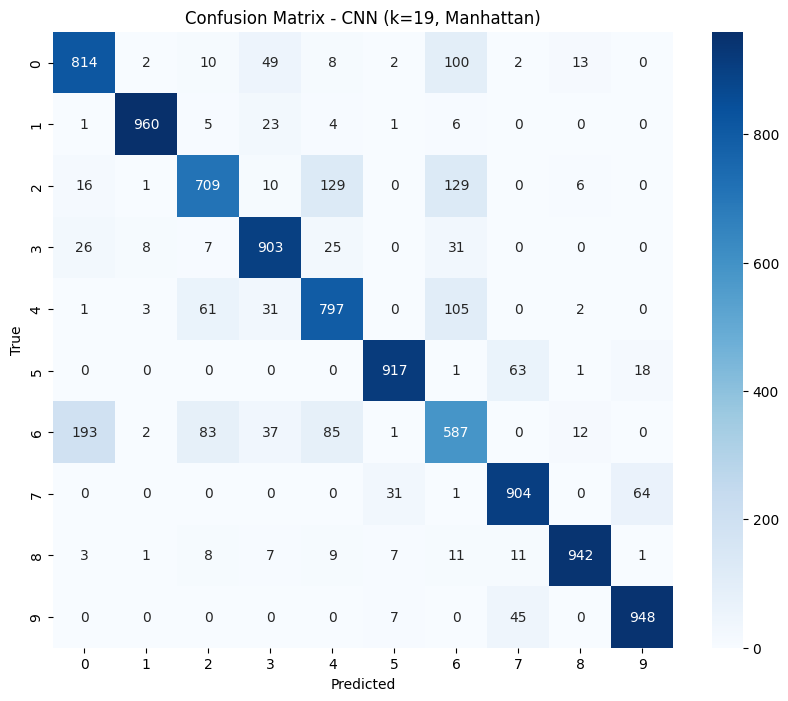


Evaluating MLP features...
MLP Accuracy: 0.8627


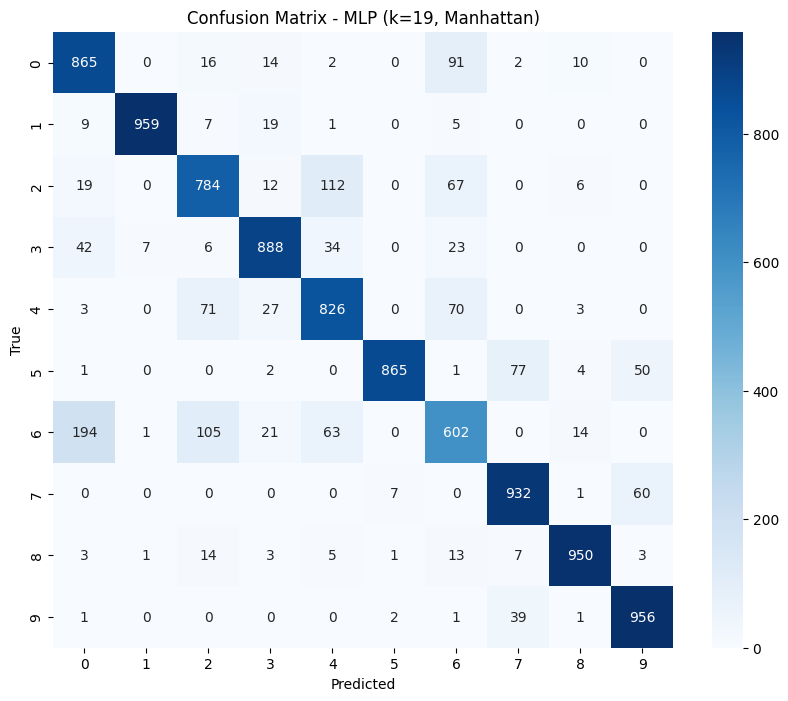


Evaluating PCA features...
PCA Accuracy: 0.8526


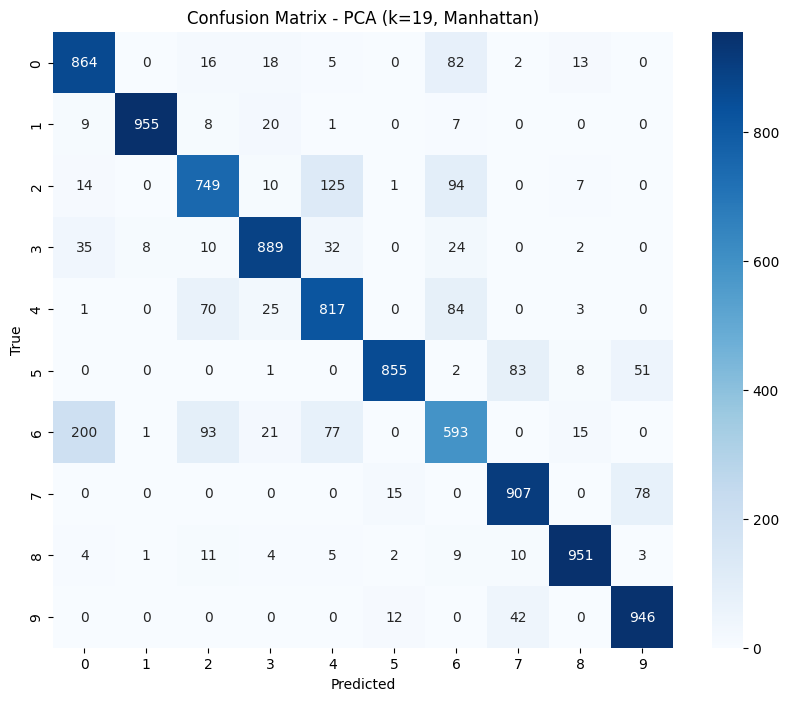

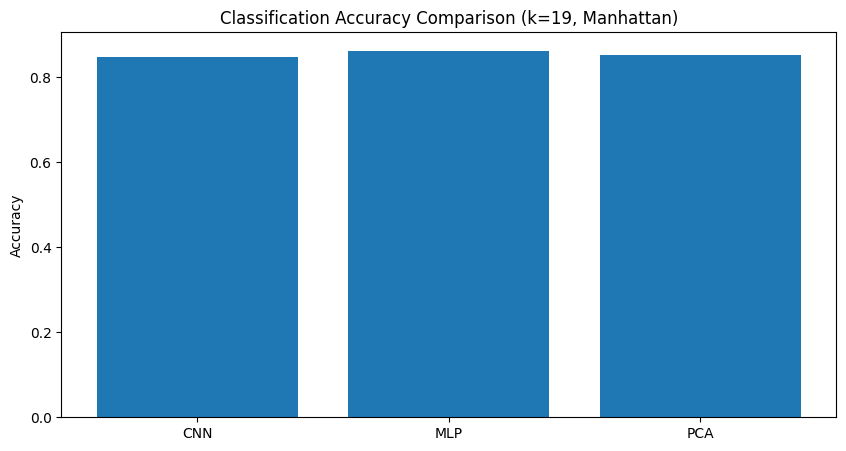


Classes with similar performance across models:
T-shirt/top: Mean accuracy = 0.8477
Trouser: Mean accuracy = 0.9580
Pullover: Mean accuracy = 0.7473
Dress: Mean accuracy = 0.8933
Coat: Mean accuracy = 0.8133
Sandal: Mean accuracy = 0.8790
Shirt: Mean accuracy = 0.5940
Sneaker: Mean accuracy = 0.9143
Bag: Mean accuracy = 0.9477
Ankle boot: Mean accuracy = 0.9500


In [56]:
# Cell 7: KNN Classification Implementation (4.5) with Vectorized KNN
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class KNN:
    def __init__(self, k=19, distance_metric='manhattan', batch_size=100):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size
        self.distance_functions = {
            'euclidean': self.euclidean_distance,
            'manhattan': self.manhattan_distance,
            'cosine': self.cosine_distance
        }

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        num_samples = X.shape[0]
        predictions = np.zeros(num_samples, dtype=self.y_train.dtype)
        
        for i in range(0, num_samples, self.batch_size):
            batch = X[i:i+self.batch_size]
            distances = self.distance_functions[self.distance_metric](batch, self.X_train)
            k_indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
            k_nearest_labels = self.y_train[k_indices]
            batch_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=k_nearest_labels)
            predictions[i:i+self.batch_size] = batch_predictions
        
        return predictions

    @staticmethod
    def euclidean_distance(X1, X2):
        return np.sqrt(np.sum((X1[:, np.newaxis, :] - X2) ** 2, axis=2))

    @staticmethod
    def manhattan_distance(X1, X2):
        return np.sum(np.abs(X1[:, np.newaxis, :] - X2), axis=2)

    @staticmethod
    def cosine_distance(X1, X2):
        dot_product = np.einsum('ijk,jk->ij', X1[:, np.newaxis, :], X2)
        norm_X1 = np.linalg.norm(X1, axis=1)
        norm_X2 = np.linalg.norm(X2, axis=1)
        return 1 - (dot_product / (norm_X1[:, np.newaxis] * norm_X2))

# Extract features from all models
def extract_features(model, loader):
    features = []
    labels = []
    with torch.no_grad():
        for images, batch_labels in loader:
            if isinstance(model, (CnnAutoencoder, MLPAutoencoder)):
                images = images.to(device)
                encoded = model.encode(images).cpu().numpy()
                features.append(encoded.reshape(encoded.shape[0], -1))
            else:  # PCA
                encoded = model.encode(images.numpy())
                features.append(encoded)
            labels.extend(batch_labels.numpy())
    return np.concatenate(features), np.array(labels)

# Get features for all models
models = {
    'CNN': cnn_model,
    'MLP': mlp_model,
    'PCA': pca_ae
}

results = {}
for name, model in models.items():
    print(f"\nEvaluating {name} features...")
    
    # Extract features
    X_train_feat, y_train = extract_features(model, train_loader)
    X_test_feat, y_test = extract_features(model, test_loader)
    
    # Ensure all features have the same dimensionality (use k_optimal)
    if X_train_feat.shape[1] > k_optimal:
        pca = PCAAutoencoder(n_components=k_optimal)
        pca.fit(X_train_feat)
        X_train_feat = pca.encode(X_train_feat)
        X_test_feat = pca.encode(X_test_feat)
    
    # Train KNN and evaluate using manhattan distance and k=19
    knn = KNN(k=19, distance_metric='manhattan')
    knn.fit(X_train_feat, y_train)
    predictions = knn.predict(X_test_feat)
    accuracy = np.mean(predictions == y_test)
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (k=19, Manhattan)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    results[name] = {
        'accuracy': accuracy,
        'predictions': predictions,
        'true_labels': y_test
    }

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
accuracies = [results[name]['accuracy'] for name in models.keys()]
plt.bar(models.keys(), accuracies)
plt.title('Classification Accuracy Comparison (k=19, Manhattan)')
plt.ylabel('Accuracy')
plt.show()

# Analyze common patterns
def analyze_class_performance(results, class_names):
    print("\nClasses with similar performance across models:")
    for i, class_name in enumerate(class_names):
        accuracies = []
        for name in results:
            mask = (results[name]['true_labels'] == i)
            acc = np.mean(results[name]['predictions'][mask] == results[name]['true_labels'][mask])
            accuracies.append(acc)
        if max(accuracies) - min(accuracies) < 0.1:
            print(f"{class_name}: Mean accuracy = {np.mean(accuracies):.4f}")

analyze_class_performance(results, class_names)